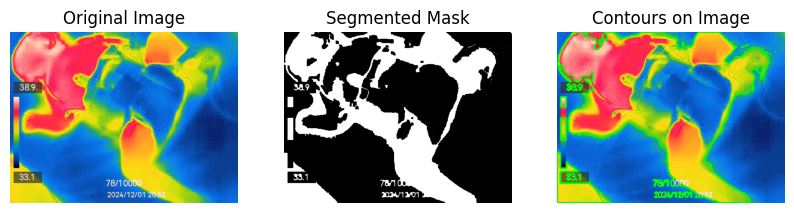

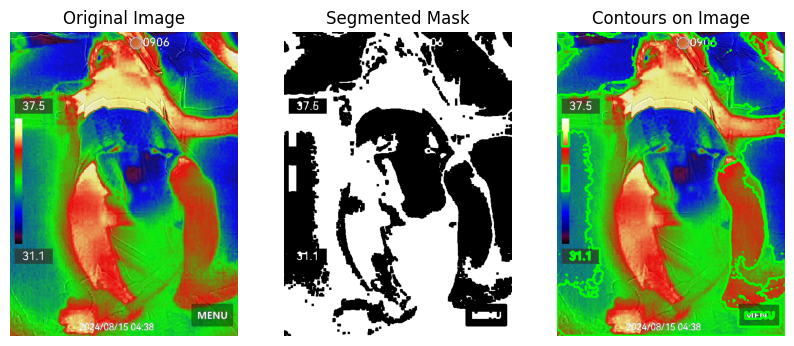

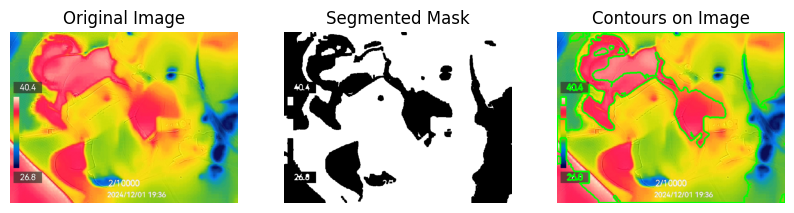

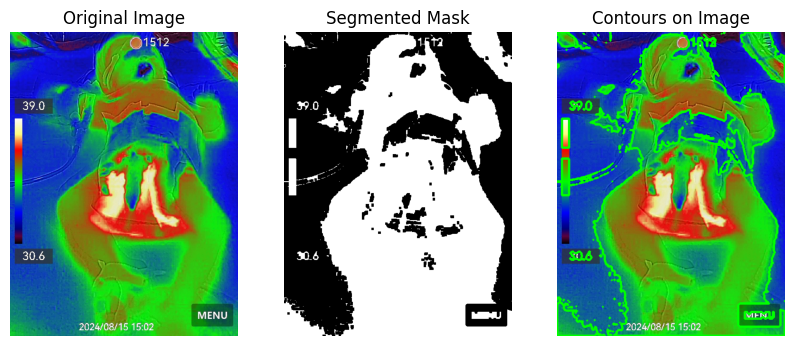

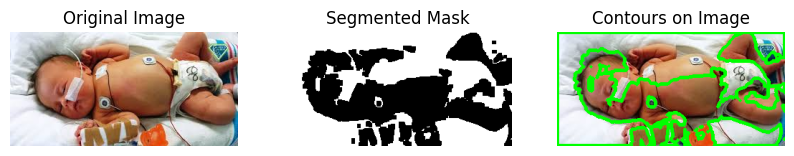

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Load images
image_paths = [
    "C:/Users/propietari/Downloads/HM20241201205336.jpeg",
    "C:/Users/propietari/Downloads/HM20240815043811.jpeg", 
    "C:/Users/propietari/Downloads/HM20241201193602.jpeg",
    "C:/Users/propietari/Downloads/HM20240815150255.jpeg",
    "C:/Users/propietari/Downloads/images.jfif"
]

for img_path in image_paths:
    # Read image
    img = cv2.imread(img_path)

    img = cv2.imread(img_path)
    
    if img is None:
        print(f"Error: Unable to load image {img_path}")
        continue  # Skip to next image

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply Otsu's thresholding
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Apply Morphological Operations to remove noise
    kernel = np.ones((5,5), np.uint8)
    morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    
    # Find contours
    contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Draw contours on original image
    img_contour = img_rgb.copy()
    cv2.drawContours(img_contour, contours, -1, (0,255,0), 3)
    
    # Show results
    plt.figure(figsize=(10,5))
    plt.subplot(1,3,1)
    plt.imshow(img_rgb)
    plt.title("Original Image")
    plt.axis("off")
    
    plt.subplot(1,3,2)
    plt.imshow(morph, cmap='gray')
    plt.title("Segmented Mask")
    plt.axis("off")
    
    plt.subplot(1,3,3)
    plt.imshow(img_contour)
    plt.title("Contours on Image")
    plt.axis("off")
    
    plt.show()


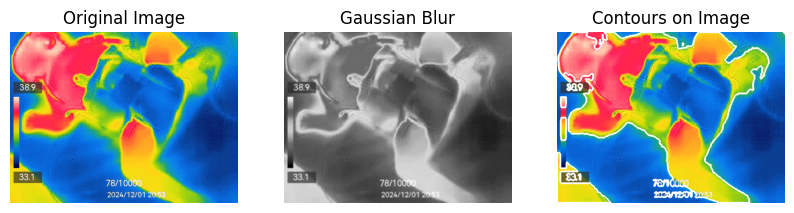

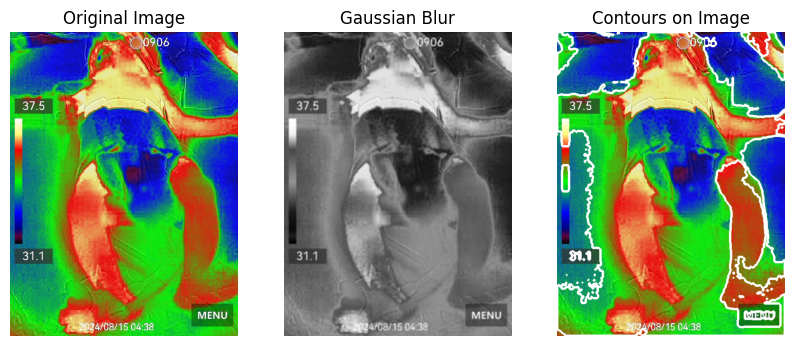

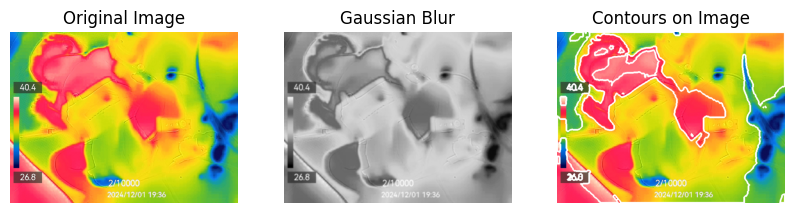

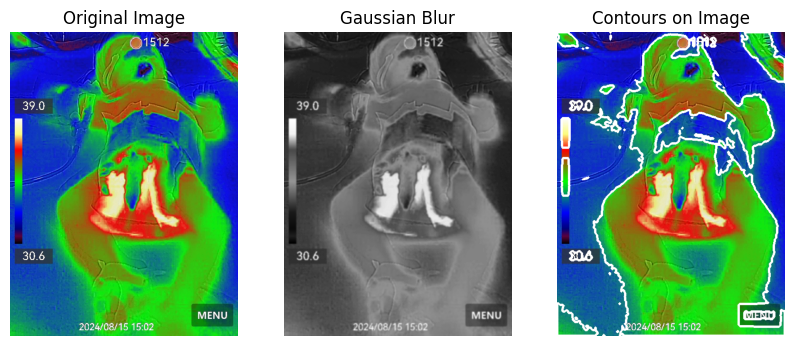

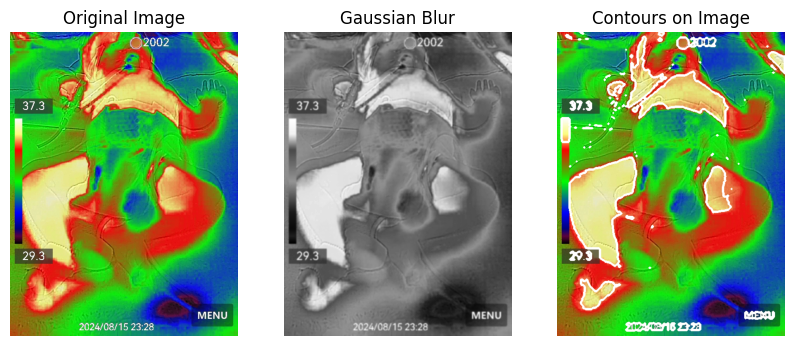

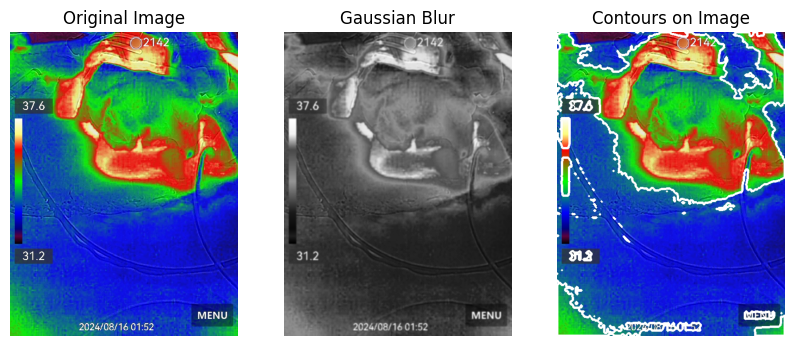

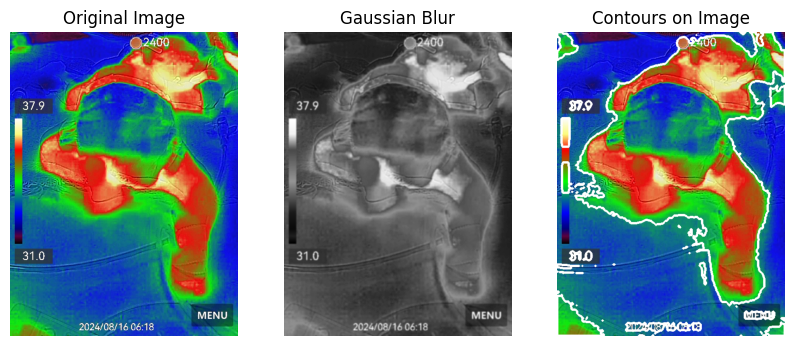

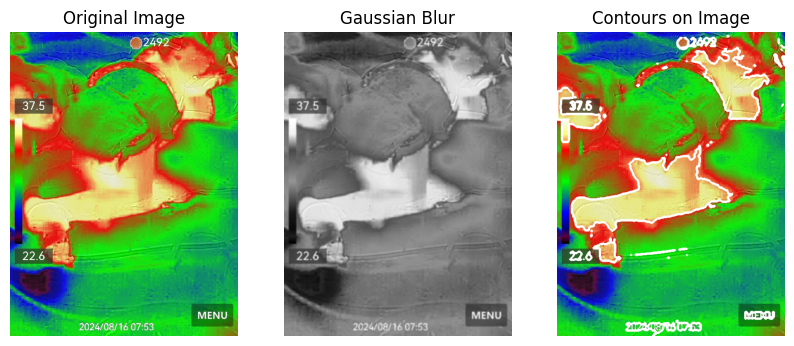

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Load images
image_paths = [
    "C:/Users/propietari/Downloads/HM20241201205336.jpeg",
    "C:/Users/propietari/Downloads/HM20240815043811.jpeg", 
    "C:/Users/propietari/Downloads/HM20241201193602.jpeg",
    "C:/Users/propietari/Downloads/HM20240815150255.jpeg",
    "C:/Users/propietari/Downloads/HM20240815232802.jpeg",
    "C:/Users/propietari/Downloads/HM20240816015227.jpeg",
    "C:/Users/propietari/Downloads/HM20240816061812.jpeg",
    "C:/Users/propietari/Downloads/HM20240816075315.jpeg"
]

for img_path in image_paths:
    # Read image
    img = cv2.imread(img_path)
    
    if img is None:
        print(f"Error: Unable to load image {img_path}")
        continue  # Skip to next image

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #apply gaussian blur
    blur = cv2.GaussianBlur(gray, (5,5), 0)
  
    # Apply Otsu's thresholding
    _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

   
    # Apply Morphological Operations to remove noise
    kernel = np.ones((5,5), np.uint8)
    morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    
    # Find contours
    contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Draw contours on original image
    img_contour = img_rgb.copy()
    cv2.drawContours(img_contour, contours, -1, (255,255,255), 3)
    
    # Show results
    plt.figure(figsize=(10,5))
    plt.subplot(1,3,1)
    plt.imshow(img_rgb)
    plt.title("Original Image")
    plt.axis("off")
    
    plt.subplot(1,3,2)
    plt.imshow(blur, cmap='gray')
    plt.title("Gaussian Blur")
    plt.axis("off")
    
    plt.subplot(1,3,3)
    plt.imshow(img_contour)
    plt.title("Contours on Image")
    plt.axis("off")
    
    plt.show()


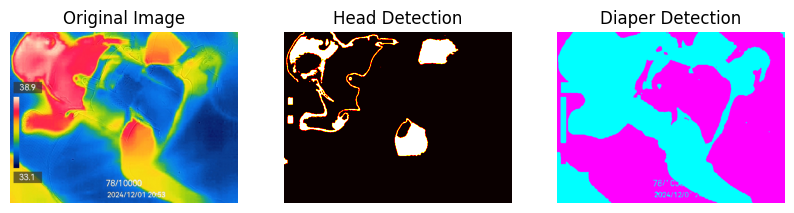

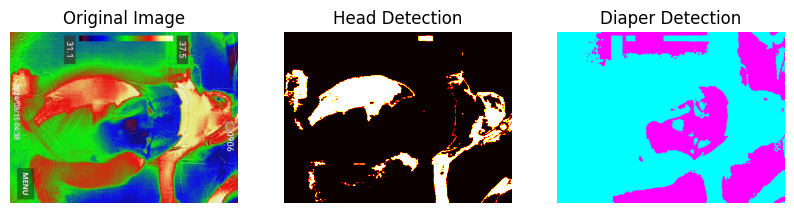

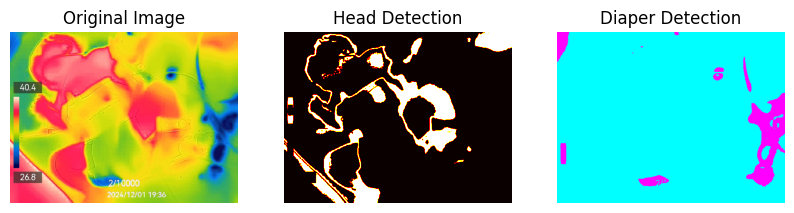

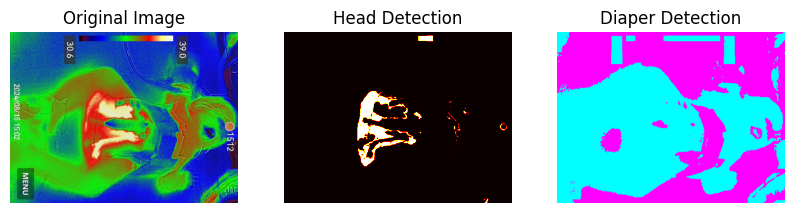

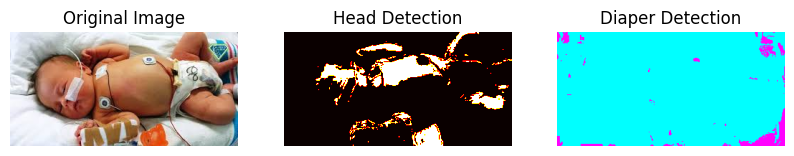

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load Image using PIL
def load_image_pil(image_path):
    try:
        img = Image.open(image_path)
        img = img.convert("RGB")
        return np.array(img)
    except Exception as e:
        print(f"Error loading {image_path}: {e}")
        return None

# Define Color Ranges for Diaper & Head (HSV)
def segment_thermal_regions(img):
    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Convert PIL to OpenCV format
    img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)  # Convert to HSV

    # Define HSV ranges for Head (hot areas)
    lower_head = np.array([0, 50, 200])  # Adjust based on the thermal image
    upper_head = np.array([20, 255, 255])
    
    # Define HSV ranges for Diaper (cooler areas)
    lower_diaper = np.array([80, 20, 100])  
    upper_diaper = np.array([130, 255, 255])

    # Create masks
    mask_head = cv2.inRange(img_hsv, lower_head, upper_head)
    mask_diaper = cv2.inRange(img_hsv, lower_diaper, upper_diaper)

    return mask_head, mask_diaper

image_paths = [
    "C:/Users/propietari/Downloads/HM20241201205336.jpeg",
    "C:/Users/propietari/Downloads/HM20240815043811.jpeg", 
    "C:/Users/propietari/Downloads/HM20241201193602.jpeg",
    "C:/Users/propietari/Downloads/HM20240815150255.jpeg",
    "C:/Users/propietari/Downloads/images.jfif"
]

for img_path in image_paths:
    img = load_image_pil(img_path)
    if img is None:
        continue  # Skip if image couldn't be loaded

    # Get masks
    mask_head, mask_diaper = segment_thermal_regions(img)

    # Display results
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,3,1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis("off")
    
    plt.subplot(1,3,2)
    plt.imshow(mask_head, cmap="hot")
    plt.title("Head Detection")
    plt.axis("off")

    plt.subplot(1,3,3)
    plt.imshow(mask_diaper, cmap="cool")
    plt.title("Diaper Detection")
    plt.axis("off")

    plt.show()


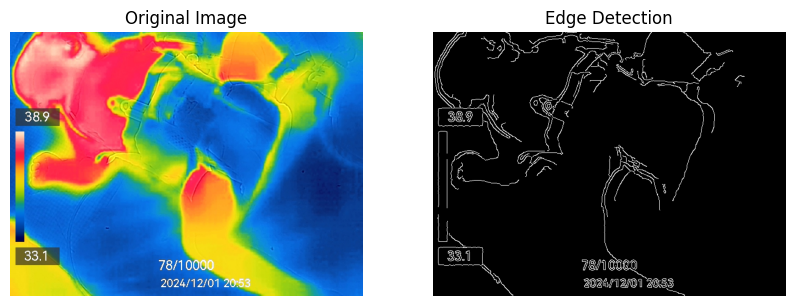

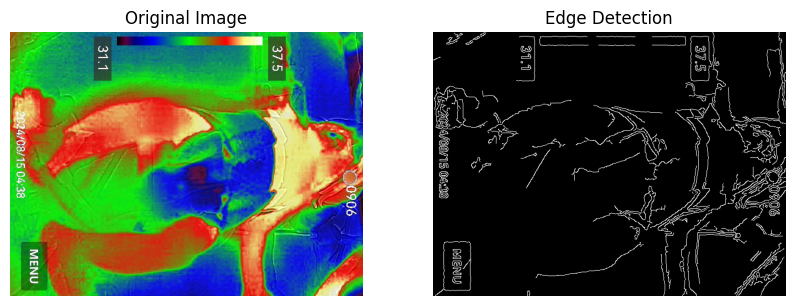

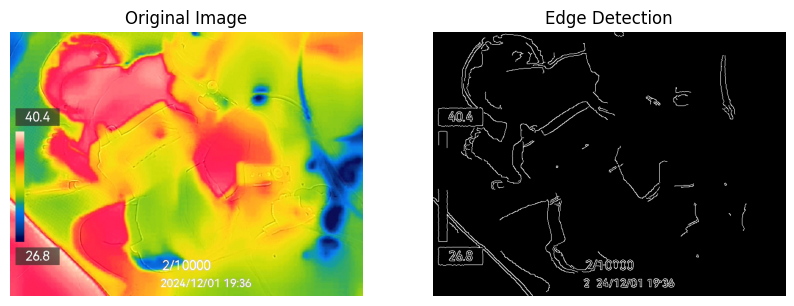

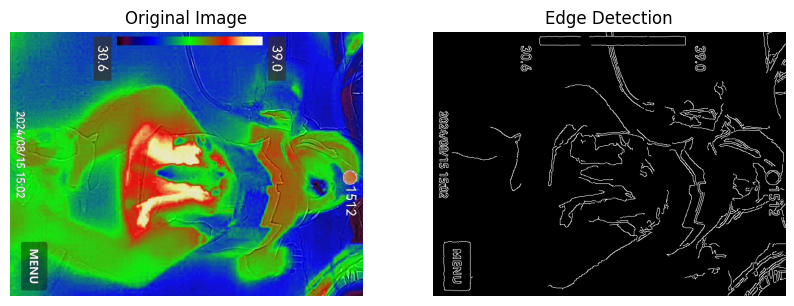

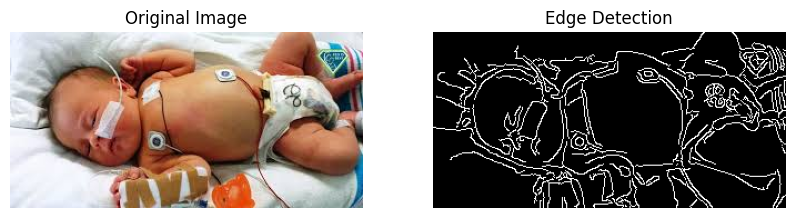

In [9]:
image_paths = [
    "C:/Users/propietari/Downloads/HM20241201205336.jpeg",
    "C:/Users/propietari/Downloads/HM20240815043811.jpeg", 
    "C:/Users/propietari/Downloads/HM20241201193602.jpeg",
    "C:/Users/propietari/Downloads/HM20240815150255.jpeg",
    "C:/Users/propietari/Downloads/images.jfif"
]

for img_path in image_paths:
    img = load_image_pil(img_path)
    if img is None:
        continue  # Skip if image couldn't be loaded

    #edge detection
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_blur = cv2.GaussianBlur(img_gray, (5,5), 0)
    edges = cv2.Canny(img_blur, 50, 150)

    # Display results
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(edges, cmap="gray")
    plt.title("Edge Detection")
    plt.axis("off")
    

    plt.show()


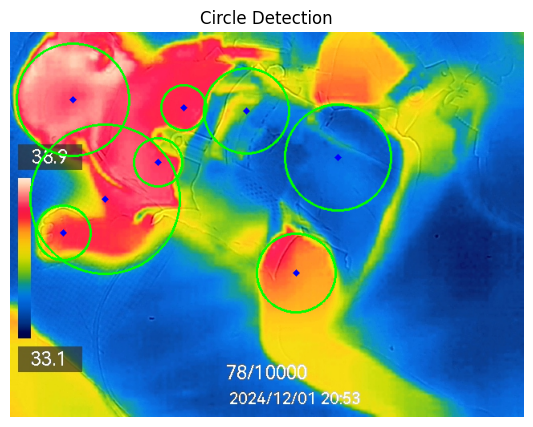

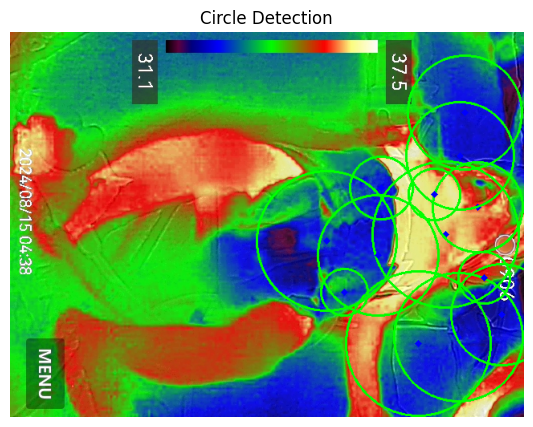

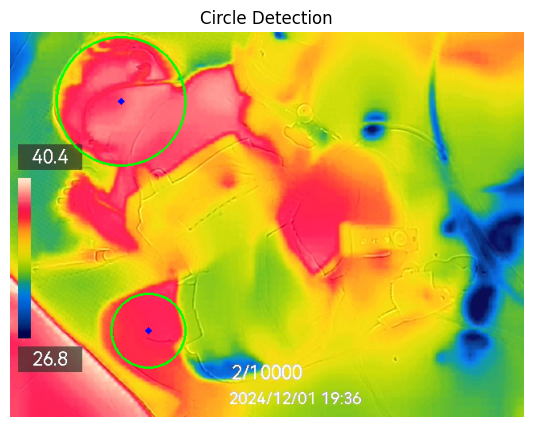

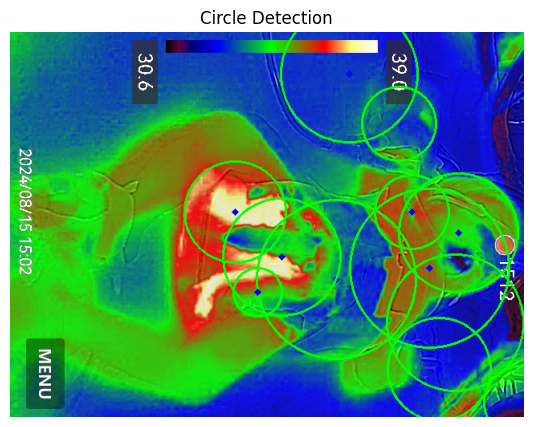

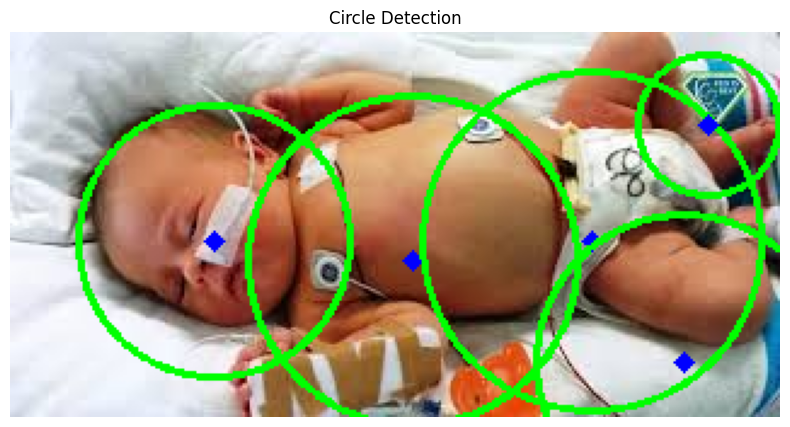

In [10]:
image_paths = [
    "C:/Users/propietari/Downloads/HM20241201205336.jpeg",
    "C:/Users/propietari/Downloads/HM20240815043811.jpeg", 
    "C:/Users/propietari/Downloads/HM20241201193602.jpeg",
    "C:/Users/propietari/Downloads/HM20240815150255.jpeg",
    "C:/Users/propietari/Downloads/images.jfif"
]

for img_path in image_paths:
    img = load_image_pil(img_path)
    if img is None:
        continue  # Skip if image couldn't be loaded

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Apply Gaussian Blur
    blur = cv2.GaussianBlur(gray, (5,5), 0)

    # Apply Hough Transform
    circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, dp=1, minDist=50, param1=100, param2=30, minRadius=20, maxRadius=100)

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0,:]:
            cv2.circle(img, (i[0], i[1]), i[2], (0,255,0), 2)
            cv2.circle(img, (i[0], i[1]), 2, (0,0,255), 3)
    
    # Display results
    plt.figure(figsize=(10,5))
    plt.imshow(img)
    plt.title("Circle Detection")
    plt.axis("off")
    plt.show()
